In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier


from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import missingno as msn

#target : more dominant

In [3]:
chemin = input("Entrer le chemin : ")

def read_data(path):
    df = pd.read_csv(r"{}".format(path))
    return df
df = read_data(chemin)
df

Entrer le chemin :  C:\Users\hp\Downloads\dataset.csv


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [4]:
def drop_id(dataframe):
    if 'id' in dataframe.columns:
        dataframe.drop(['id'], axis = 1, inplace= True)
    else:
        pass
    

drop_id(df)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### Contrôle de l'intégrité des données

In [20]:
df.shape

(43400, 11)

In [21]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [7]:
df.isnull().sum() ## trouver les valeurs manquantes

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [9]:
df.isnull().sum()/df.shape[0]*100 # calculons les pourcentages des valeurs manquantes pour decider de supprimer les colonnes ou bien de les imputer

gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [10]:
df.duplicated().sum() # trouver est ce qu'il y'a des doublons

0

In [22]:
# identifiant les valeurs inutiles (peut etre just dans les valeurs de type object)
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('***'*10)

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64
******************************
ever_married
Yes    27938
No     15462
Name: count, dtype: int64
******************************
work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64
******************************
Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64
******************************
smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64
******************************


In [87]:
# classifier notre dataset entre valeurs numeriques et valeurs categoriel
str_num = input('Donner les variables numeriques separees par / : ')
str_cat = input('Donner les variables categoriques separees par / : ')
# age/avg_glucose_level/bmi
# gender/hypertension/heart_disease/ever_married/work_type/Residence_type/smoking_status
num_variables = list(str_num.split('/'))
cat_variables = list(str_cat.split('/'))


print('Variables numeriques :', num_variables)
print('Variables categoriques :', cat_variables)

Donner les variables numeriques separees par / :  age/avg_glucose_level/bmi
Donner les variables categoriques separees par / :  gender/hypertension/heart_disease/ever_married/work_type/Residence_type/smoking_status


Variables numeriques : ['age', 'avg_glucose_level', 'bmi']
Variables categoriques : ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [88]:
num_variables

['age', 'avg_glucose_level', 'bmi']

### l'analyse exploratoire des données

In [89]:
df.describe() # statistiques pour les valeurs numeriques(on s'interesse dans ce cas de: age, avg_glucose_level, bmi)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [90]:
df.describe(include='object') # pour les valeurs non numeriques

,gender,ever_married,work_type,Residence_type,smoking_status
count,43400,43400,43400,43400,30108
unique,3,2,5,2,3
top,Female,Yes,Private,Urban,never smoked
freq,25665,27938,24834,21756,16053


### comprendre la distribution (histogrammes)

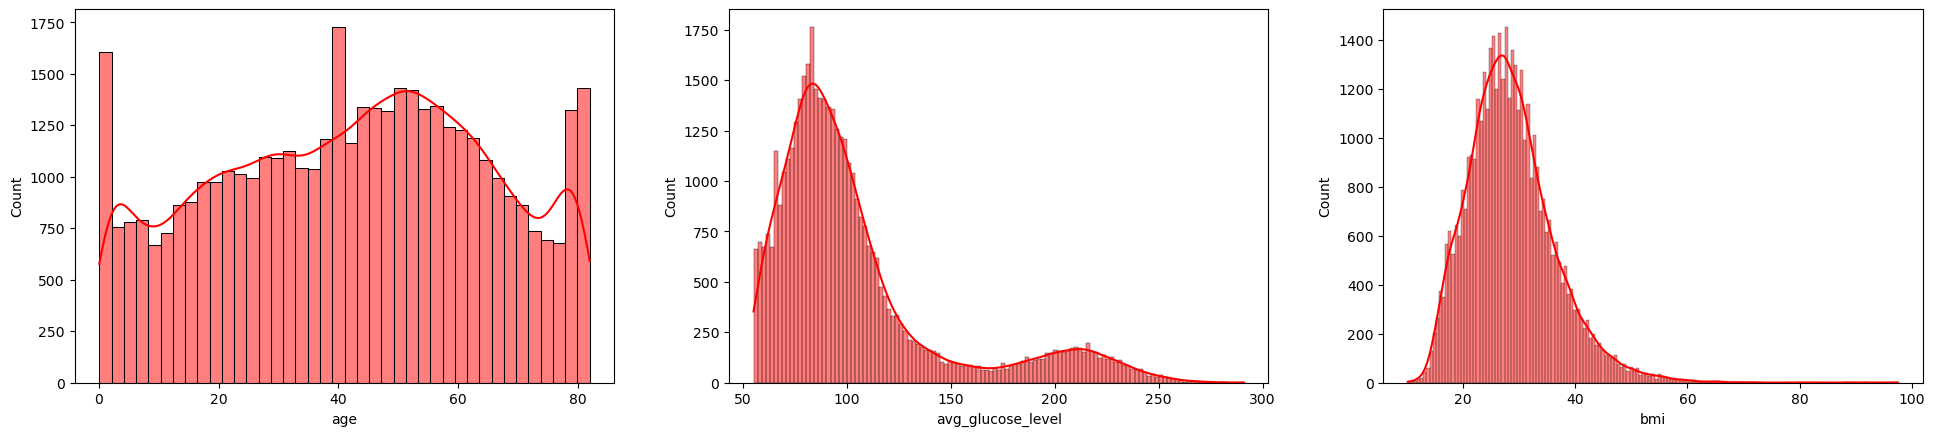

In [91]:
# pour les valeurs numeriques
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(num_variables, axs.flatten()):
    sns.histplot(df[var], kde=True, ax=subplot, color='red')

plt.tight_layout(pad=3)
plt.show()

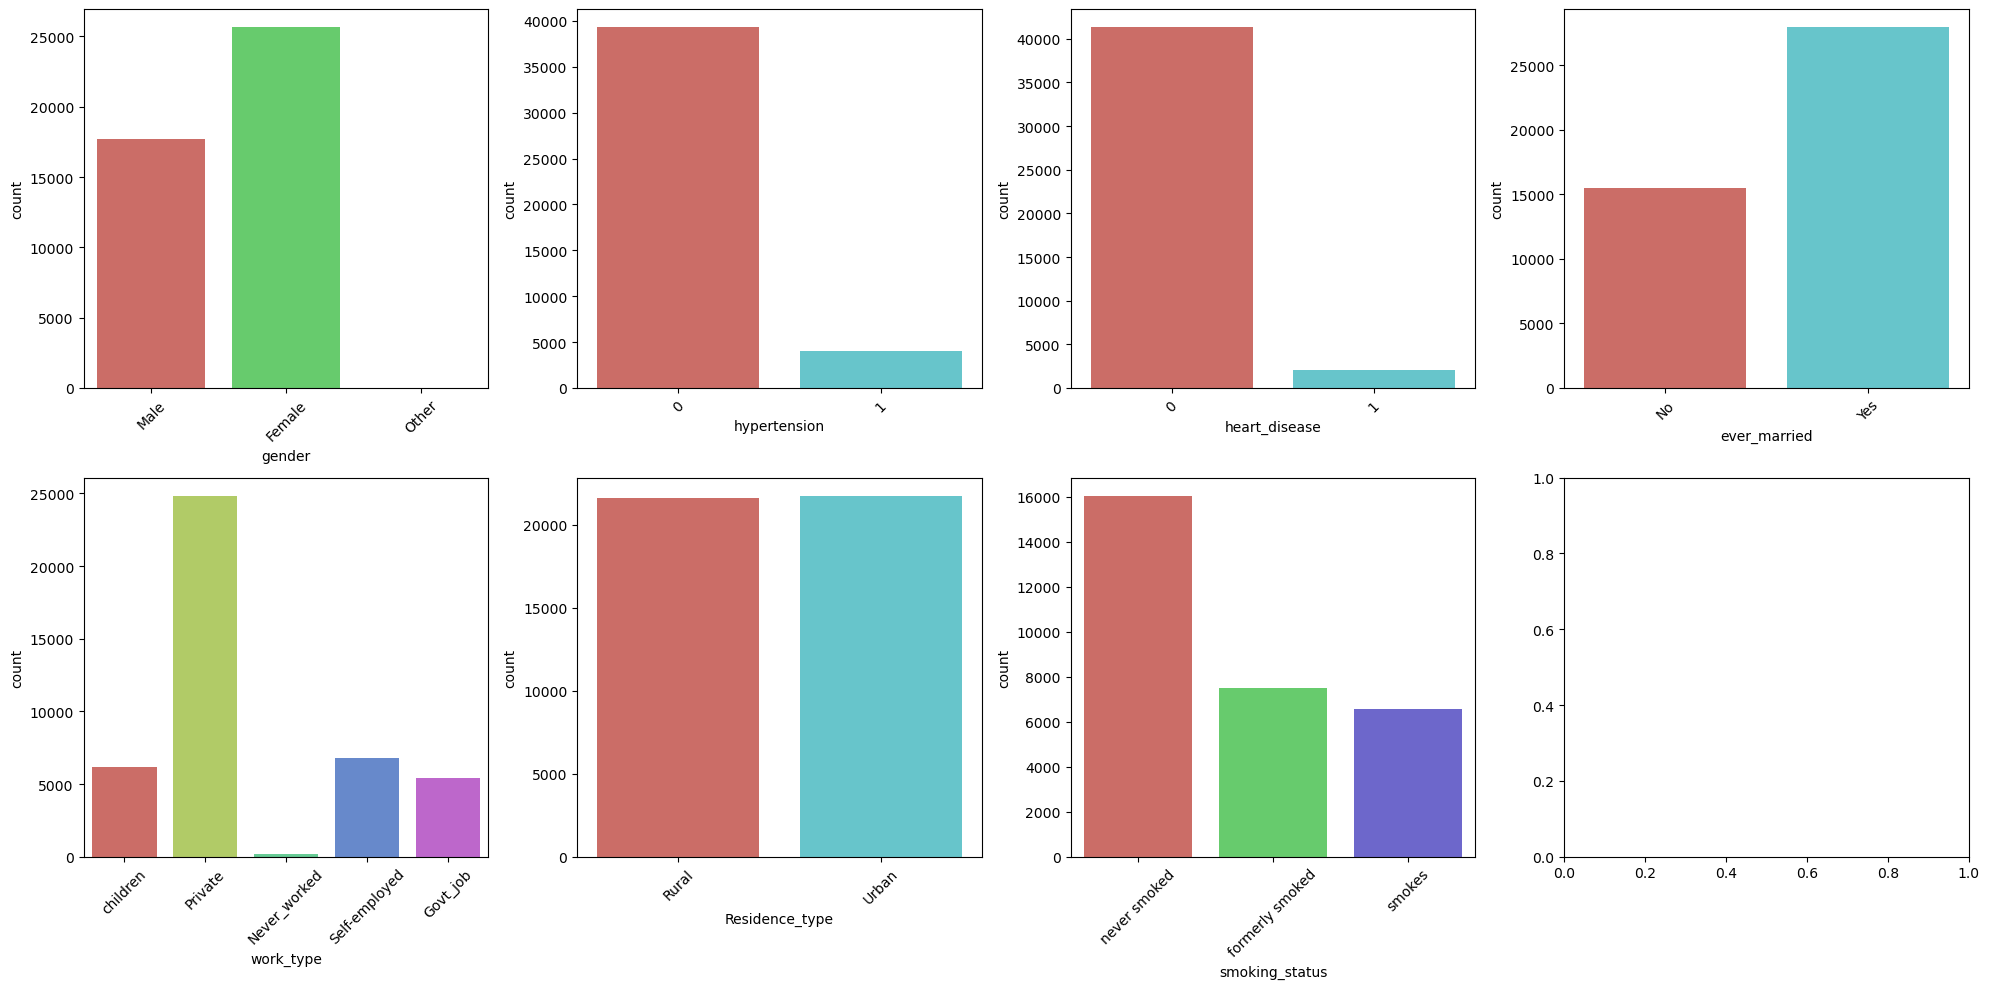

In [92]:
#pour les valeurs categorielles
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for var, subplot in zip(cat_variables, axs.flatten()):
    #print(var,subplot)
    sns.countplot(x=var, data=df, ax=subplot, palette='hls')
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

Enter the column for hue in countplot :  stroke


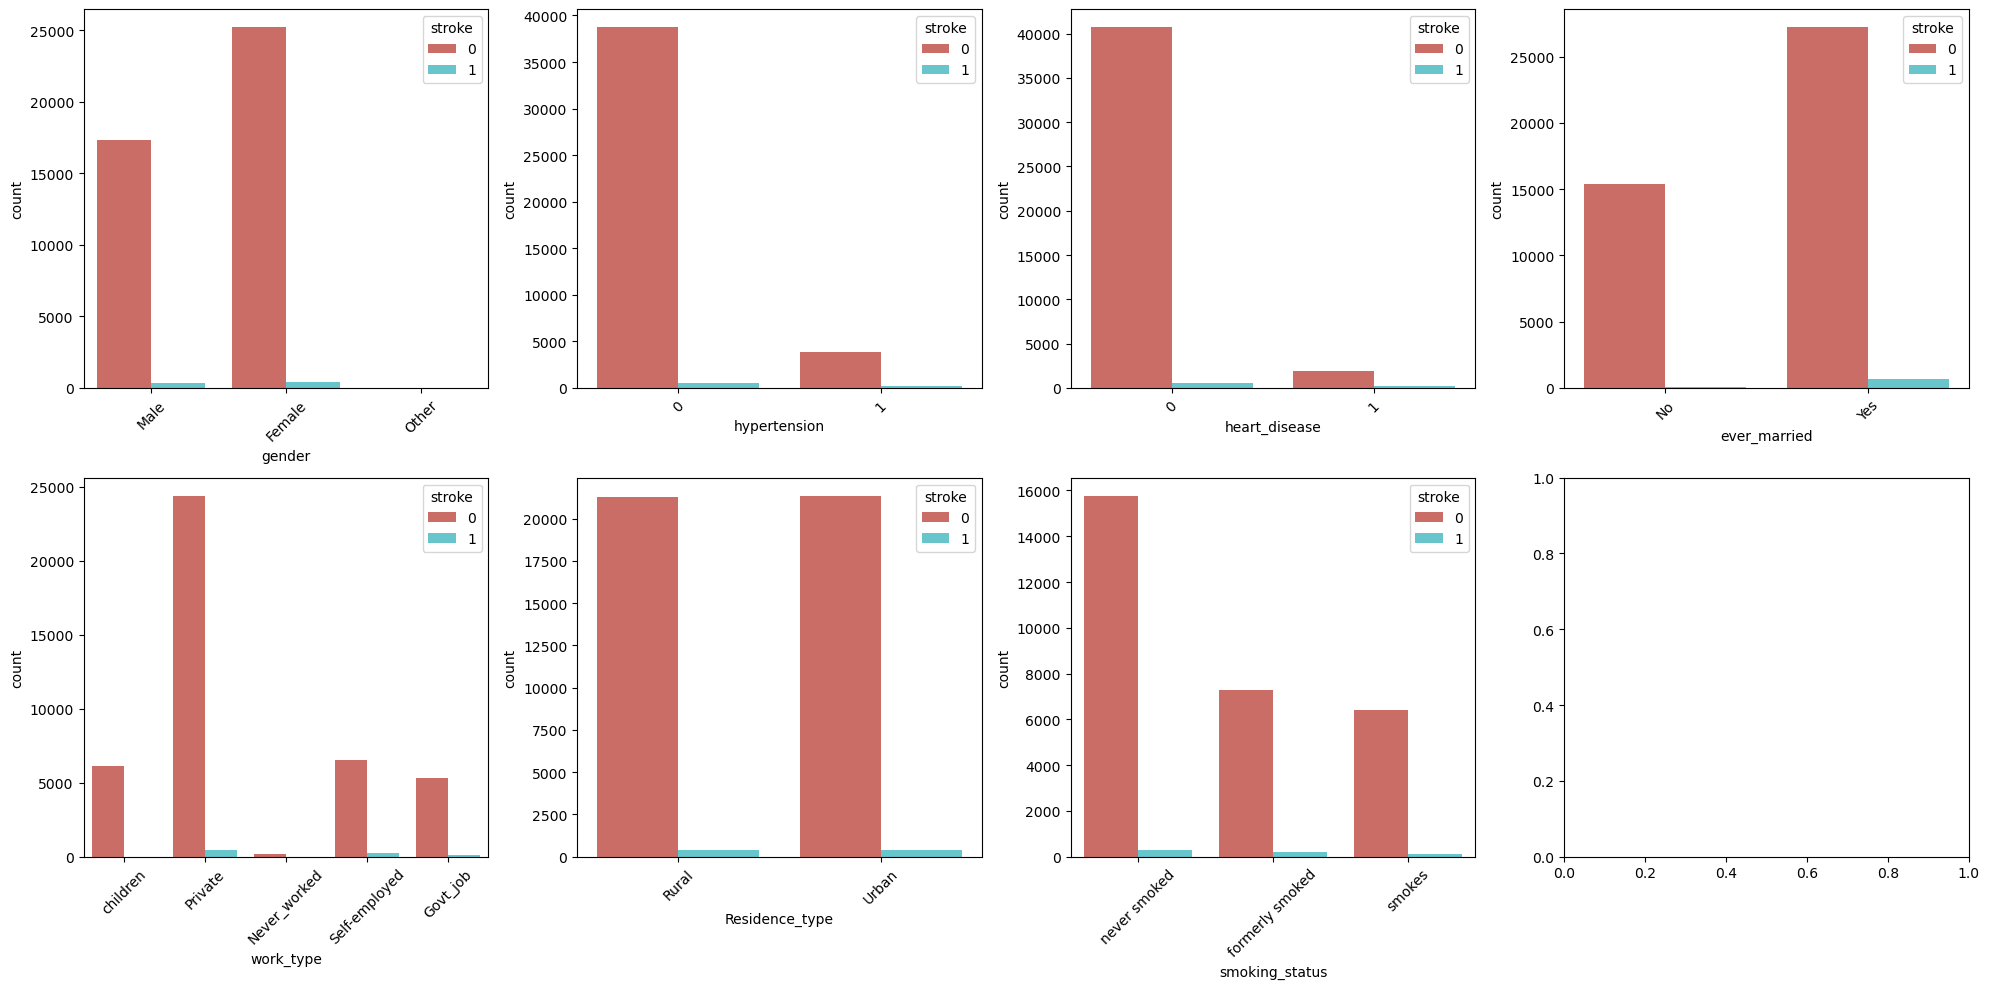

In [93]:
# Analyse bivariante (les valeurs categorielles)
col = input("Enter the column for hue in countplot : ")
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for var, subplot in zip(cat_variables, axs.flatten()):
    sns.countplot(x=df[var], hue=df[col], ax=subplot, palette='hls')
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

### identifier les valeurs aberrantes

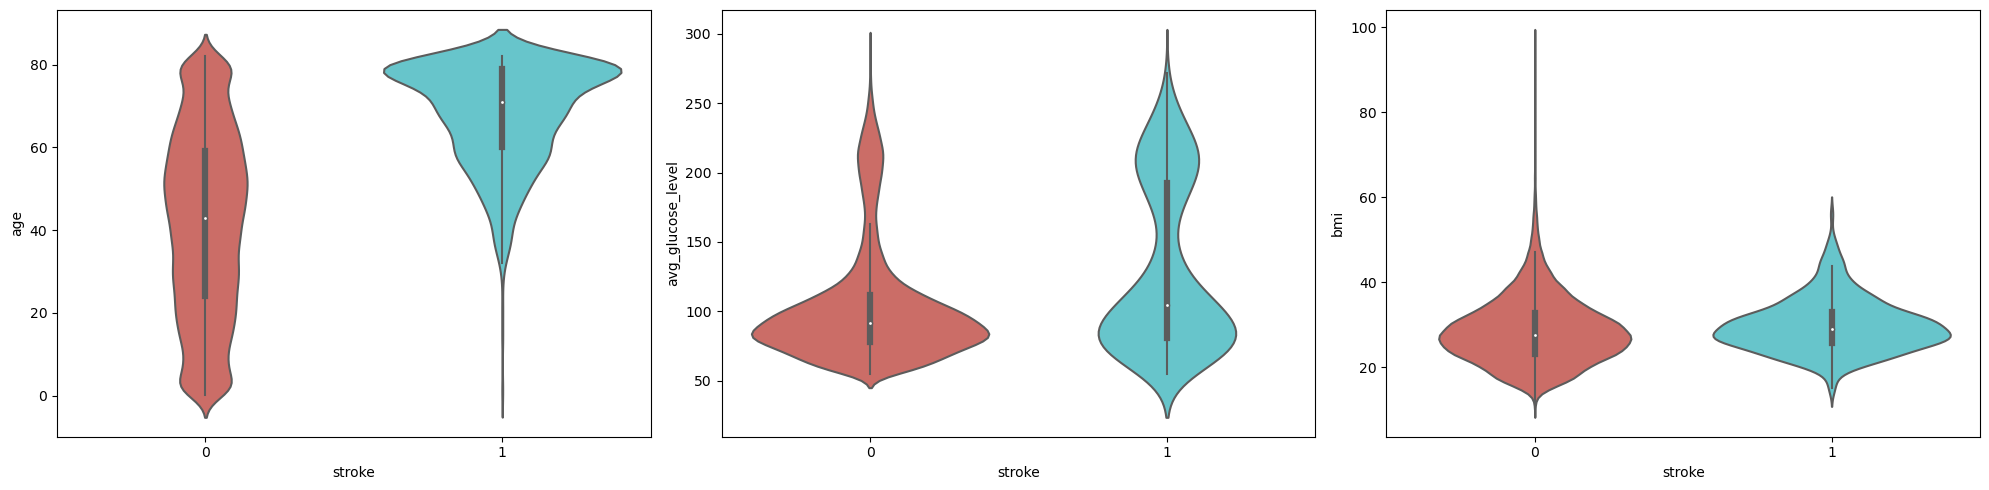

In [94]:
# Analyse bivariante (les valeurs numeriques)
fig, axs = plt.subplots(1 , 3,figsize=(20,5))

for var, subplot in zip(num_variables,axs.flatten()):
  sns.violinplot(x=df[col],y=df[var],ax=subplot, palette='hls')
plt.tight_layout()
plt.show()

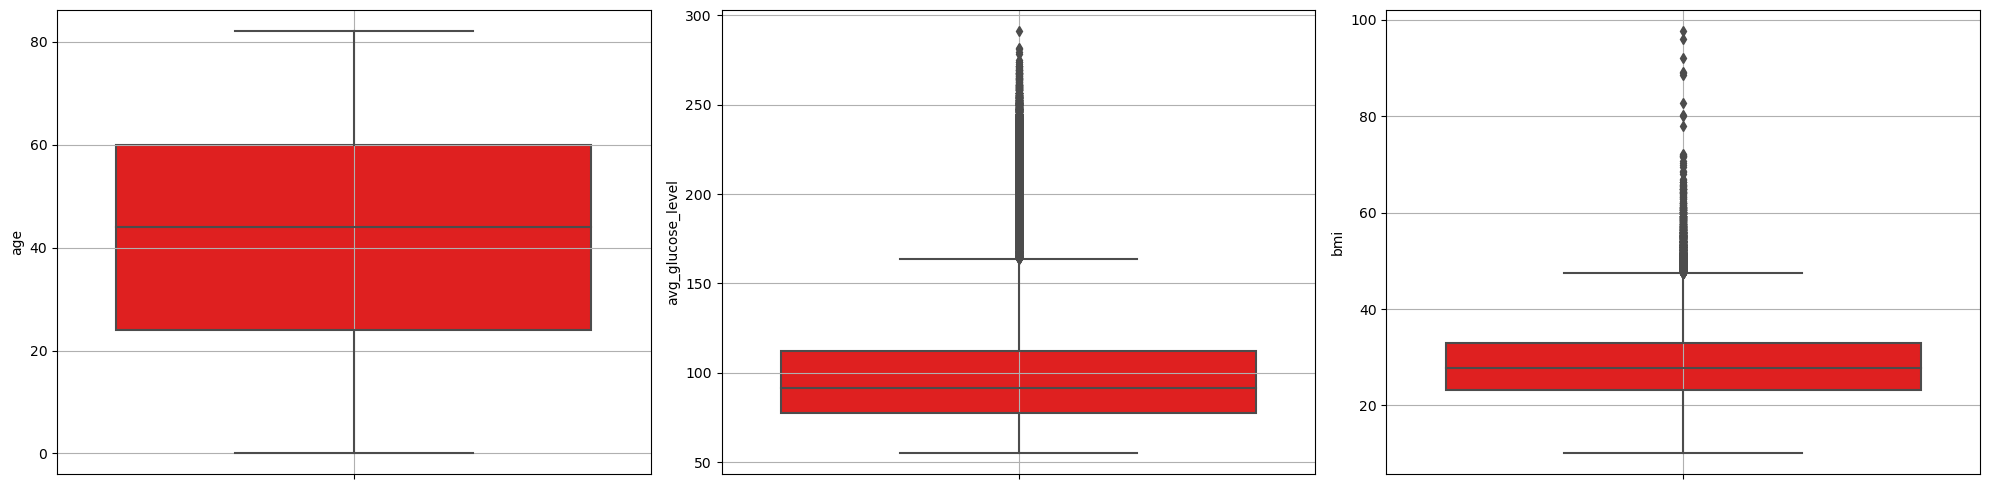

In [95]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Loop through the numeric variables
for i, var in enumerate(num_variables):
    sns.boxplot(data=df, y=var, ax=axs[i], color='red')
    axs[i].grid()


plt.tight_layout()
plt.show()

In [ ]:
### comprendre la relation entre les valeurs aberrantes et la valeur a predire

Entrer le nom du colonne :  bmi


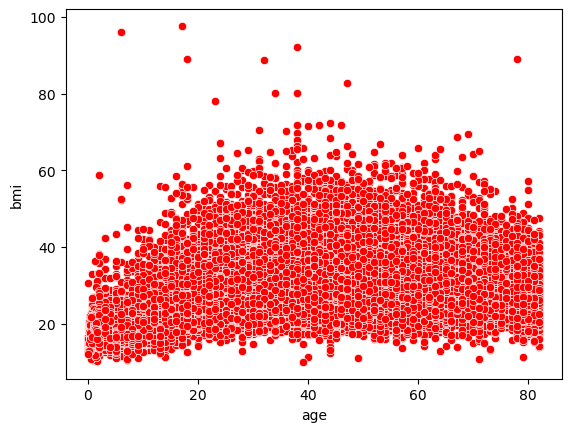

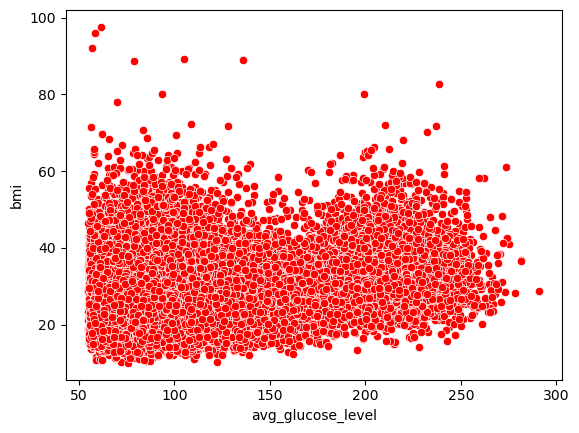

In [96]:
target = input('Entrer le nom du colonne : ')
to_work_with = num_variables.copy()
# num_variables_removed_target = list(num_variables.remove(target))
# num_variables.append(target)
to_work_with.remove(target)
for i in to_work_with:
    sns.scatterplot(data=df, x=i, y=target, color='red')
    plt.show()
#num_variables
#to_work_with

In [119]:
df_num = df[num_variables]
df_cat = df[cat_variables]

### comprendre la multicorrelation entre les colonnes

In [48]:
df_num.corr()

,age,avg_glucose_level,bmi
age,1.000000,0.237627,0.358897
avg_glucose_level,0.237627,1.000000,0.191295
bmi,0.358897,0.191295,1.000000


### si la corrélation est bonne, on peut supposer que notre modèle va donner de meilleurs résultats

<Axes: >

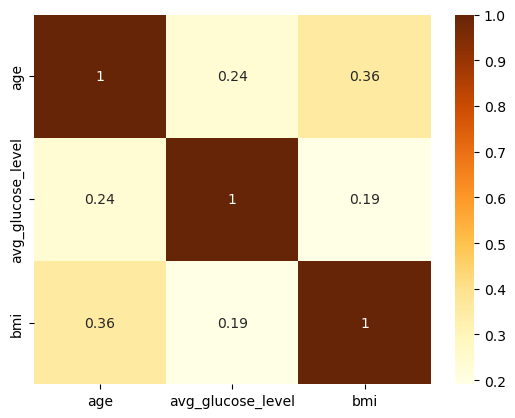

In [53]:
sns.heatmap(df_num.corr(), annot=True, cmap='YlOrBr')

### Traitement des valeurs manquantes

In [57]:
### qlq traitement pour df_num
non_na_columns = df_num.loc[: ,df_num.isna().sum() == 0].columns
non_na_columns

Index(['age', 'avg_glucose_level'], dtype='object')

In [97]:
x_test_m=df_num.loc[df_num[target].isna() == True, non_na_columns]
x_test_m

,age,avg_glucose_level
81,61.0,202.21
95,34.0,106.23
113,76.0,209.58
186,63.0,79.92
231,61.0,184.15
...,...,...
43317,62.0,72.29
43339,76.0,100.55
43351,58.0,99.29
43371,78.0,182.45


In [98]:
df_num=df_num.dropna()
X = df_num.drop([target], axis=1)
y = df_num[target]

In [99]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

33550
(33550, 2)
(8388, 2)
(33550,)
(8388,)


In [100]:
def knn_reg(X_train, y_train, X_test, y_test):
    knnr = KNeighborsRegressor()
    knnr.fit(X_train, y_train)
    y_pred = knnr.predict(X_test)
    scoring = knnr.score(X_test, y_test)
    y_pred = knnr.predict(x_test_m)
    return scoring, y_pred

def dtr_reg(X_train, y_train, X_test, y_test):
    dtr = DecisionTreeRegressor()
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_test)
    scoring = dtr.score(X_test, y_test)
    y_pred = dtr.predict(x_test_m)
    return scoring, y_pred

def rfr_reg(X_train, y_train, X_test, y_test):
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_test)
    scoring = rfr.score(X_test, y_test)
    y_pred = rfr.predict(x_test_m)
    return scoring, y_pred

In [103]:
def predict_numeric_column(X_train, y_train, X_test, y_test):
    score_knn, predicted_knn = knn_reg(X_train, y_train, X_test, y_test)
    score_dtr, predicted_dtr = dtr_reg(X_train, y_train, X_test, y_test)
    score_rfr, predicted_rfr = rfr_reg(X_train, y_train, X_test, y_test)
    
    if score_knn > score_dtr :
        if score_knn > score_rfr:
            return predicted_knn
        else:
            return predicted_rfr
    else:
        if score_dtr > score_rfr:
            return predicted_dtr
        

y_pred = predict_numeric_column(X_train, y_train, X_test, y_test)
y_pred

array([31.32, 34.68, 29.94, ..., 34.78, 30.88, 33.42])

In [104]:
df_imputed = df.copy()
df_imputed.loc[x_test_m.index, target] = y_pred 
df_imputed.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [135]:
def label_encode_dataframe(df):
    label_encoder = LabelEncoder()
    df_copy = df.copy()
    for col in df.columns:
        if df_copy[col].dtype == 'object': 
                df_copy.loc[:,col] = label_encoder.fit_transform(df_copy[col])
            
            
    
    return df_copy

In [132]:
target_cat = input('entrer la valeur a predire: ')
df_cat_without_smoke = df_cat.drop([target_cat], axis=1)

entrer la valeur a predire:  smoking_status


In [136]:
df_cat_without_smoke = label_encode_dataframe(df_cat_without_smoke)

In [137]:
df_cat_without_smoke

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type
0,1,0,0,0,4,0
1,1,1,0,1,2,1
2,0,0,0,0,2,1
3,0,0,0,1,2,0
4,1,0,0,0,1,0
...,...,...,...,...,...,...
43395,0,0,0,0,4,1
43396,0,0,0,1,0,1
43397,0,1,0,1,2,1
43398,1,0,0,1,2,1


In [139]:
non_na_columns_cat = df_cat.loc[: ,df_cat.isna().sum() == 0].columns
non_na_columns_cat

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type'],
      dtype='object')

In [140]:
x_test_m_cat=df_cat.loc[df_cat[target_cat].isna() == True, non_na_columns_cat]
x_test_m_cat

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type
0,Male,0,0,No,children,Rural
2,Female,0,0,No,Private,Urban
4,Male,0,0,No,Never_worked,Rural
5,Female,0,0,Yes,Private,Urban
10,Female,0,0,Yes,Govt_job,Urban
...,...,...,...,...,...,...
43382,Female,0,0,No,children,Urban
43385,Female,0,0,Yes,Self-employed,Urban
43389,Male,0,0,No,children,Urban
43391,Male,0,0,No,children,Urban


In [142]:
x_test_m_cat = label_encode_dataframe(x_test_m_cat)
x_test_m_cat

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type
0,1,0,0,0,4,0
2,0,0,0,0,2,1
4,1,0,0,0,1,0
5,0,0,0,1,2,1
10,0,0,0,1,0,1
...,...,...,...,...,...,...
43382,0,0,0,0,4,1
43385,0,0,0,1,3,1
43389,1,0,0,0,4,1
43391,1,0,0,0,4,1


In [145]:
df_cat=df_cat.dropna()
X_cat = df_cat.drop([target_cat], axis=1)
y_cat = df_cat[target_cat]


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type
1,Male,1,0,Yes,Private,Urban
3,Female,0,0,Yes,Private,Rural
6,Female,0,0,Yes,Private,Urban
7,Female,0,1,Yes,Self-employed,Rural
8,Female,0,0,Yes,Private,Rural
...,...,...,...,...,...,...
43395,Female,0,0,No,children,Urban
43396,Female,0,0,Yes,Govt_job,Urban
43397,Female,1,0,Yes,Private,Urban
43398,Male,0,0,Yes,Private,Urban


In [152]:
X_cat = label_encode_dataframe(X_cat)
pd.DataFrame(y_cat)

,smoking_status
1,never smoked
3,formerly smoked
6,formerly smoked
7,never smoked
8,smokes
...,...
43395,never smoked
43396,formerly smoked
43397,formerly smoked
43398,never smoked


In [155]:
splitlimit_2 = int(len(X)*0.7)

X_train_cat, X_test_cat = X_cat[:splitlimit_2], X_cat[splitlimit_2:]
y_train_cat, y_test_cat = y_cat[:splitlimit_2], y_cat[splitlimit_2:]
print(X_train_cat.shape)
print(X_test_cat.shape)
print(y_train_cat.shape)
print(y_test_cat.shape)
y_train_cat

(29356, 6)
(752, 6)
(29356,)
(752,)


1           never smoked
3        formerly smoked
6        formerly smoked
7           never smoked
8                 smokes
              ...       
42292       never smoked
42293             smokes
42294       never smoked
42295    formerly smoked
42296       never smoked
Name: smoking_status, Length: 29356, dtype: object

In [156]:
def knn_class(X_train_cat, y_train_cat, X_test_cat, y_test_cat):
    knnc = KNeighborsClassifier()
    knnc.fit(X_train_cat, y_train_cat)
    y_pred = knnc.predict(X_test_cat)
    scoring = knnc.score(X_test_cat, y_test_cat)
    y_pred = knnc.predict(x_test_m_cat)
    return scoring, y_pred

def dtc_class(X_train_cat, y_train_cat, X_test_cat, y_test_cat):
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train_cat, y_train_cat)
    y_pred = dtc.predict(X_test_cat)
    scoring = dtc.score(X_test_cat, y_test_cat)
    y_pred = dtc.predict(x_test_m_cat)
    return scoring, y_pred

def rfc_class(X_train_cat, y_train_cat, X_test_cat, y_test_cat):
    rfc = RandomForestClassifier()
    rfc.fit(X_train_cat, y_train_cat)
    y_pred = rfc.predict(X_test_cat)
    scoring = rfc.score(X_test_cat, y_test_cat)
    y_pred = rfc.predict(x_test_m_cat)
    return scoring, y_pred

In [157]:
def predict_cat_column(X_train_cat, y_train_cat, X_test_cat, y_test_cat):
    score_knn, predicted_knn = knn_class(X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    score_dtr, predicted_dtr = dtc_class(X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    score_rfr, predicted_rfr = rfc_class(X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    
    if score_knn > score_dtr :
        if score_knn > score_rfr:
            return predicted_knn
        else:
            return predicted_rfr
    else:
        if score_dtr > score_rfr:
            return predicted_dtr
        

y_pred = predict_cat_column(X_train_cat, y_train_cat, X_test_cat, y_test_cat)
pd.DataFrame(y_pred).tail(20)

,0
13272,never smoked
13273,never smoked
13274,never smoked
13275,never smoked
13276,never smoked
13277,never smoked
13278,never smoked
13279,never smoked
13280,never smoked
13281,formerly smoked


In [158]:
df_imputed.loc[x_test_m_cat.index, target_cat] = y_pred  
df_imputed.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [160]:
df_imputed

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### traitement des valeurs aberrantes

In [267]:
# df_outlier = df_imputed[num_variables]
df_final = df_imputed.copy()
df_final
# df_outlier

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### on a pris comme test sur les valeurs aberrantes df_outlier pour voir l'impact de ces valeurs sur notre dataset

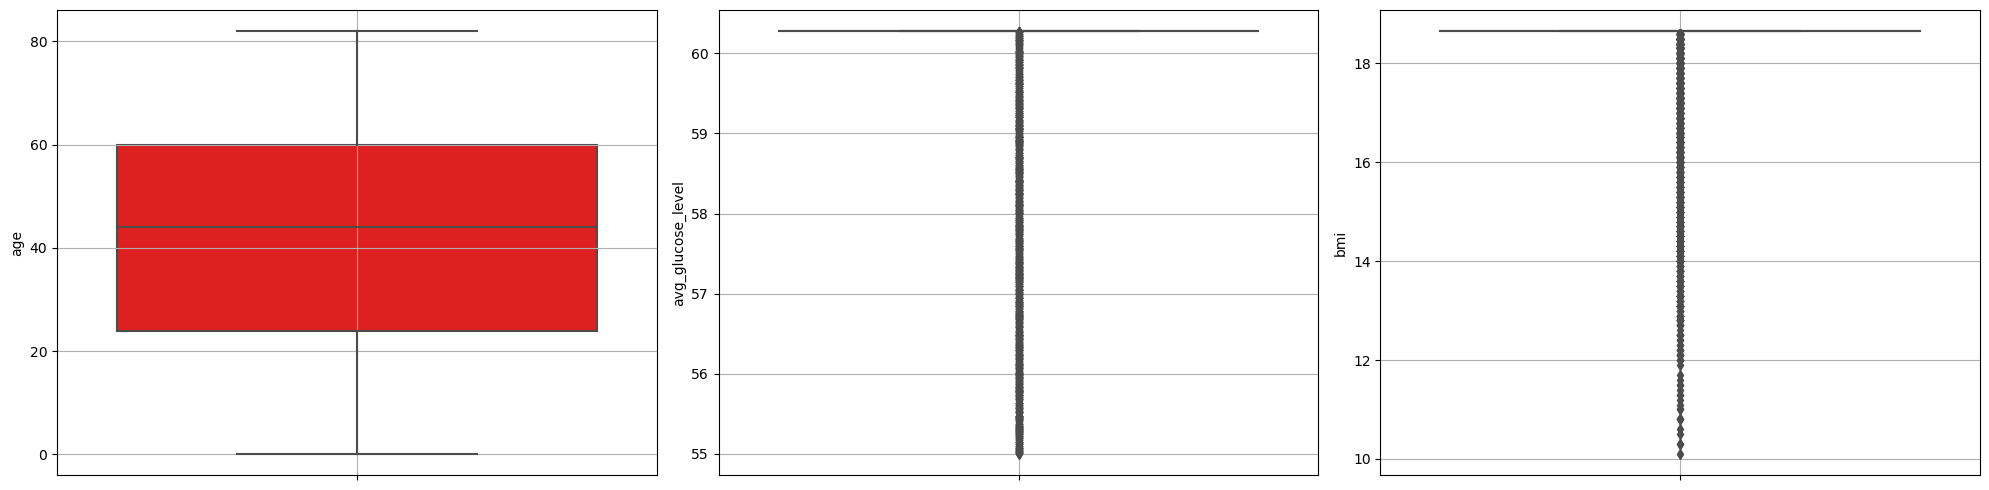

In [262]:
def treat_outliers_iqr(column):
    Q1, Q3 = np.percentile(column, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 - 1.5*IQR
    return lower_bound, upper_bound


fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Loop through the numeric variables
for i, var in enumerate(num_variables):
    sns.boxplot(data=df_outlier, y=var, ax=axs[i], color='red')
    axs[i].grid()


plt.tight_layout()
plt.show()

In [249]:
for i in ['bmi', 'avg_glucose_level']:
    lb, ub = treat_outliers_iqr(df_outlier[i])
    df_outlier.loc[df_outlier[i] < lb, i] = lb
    df_outlier.loc[df_outlier[i] > ub, i] = ub


C:\Users\hp\AppData\Local\Temp\ipykernel_9468\4078210644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier.loc[df_outlier[i] < lb, i] = lb
C:\Users\hp\AppData\Local\Temp\ipykernel_9468\4078210644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier.loc[df_outlier[i] > ub, i] = ub


### le boxplot a dispparait apres le traitement des valeurs aberrantes

### cela signifie que ces valeurs influencent au distribution de dataset

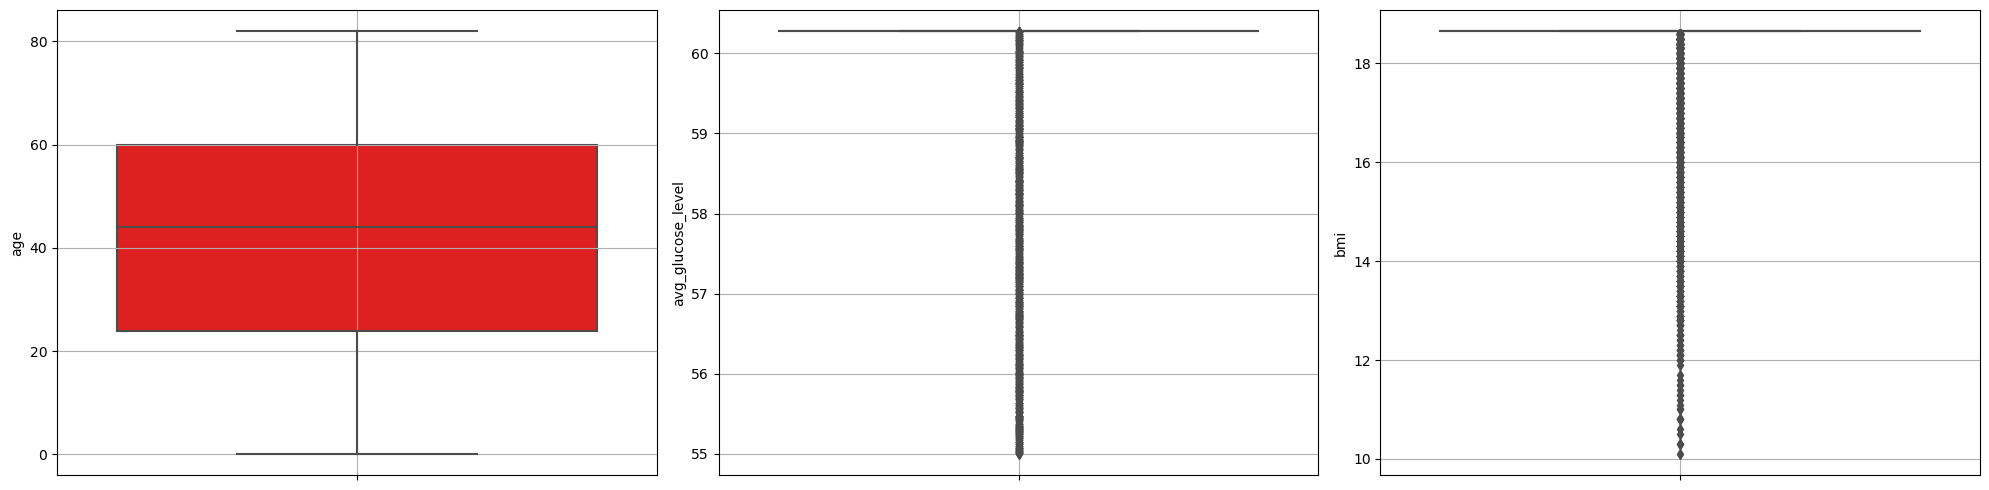

In [250]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Loop through the numeric variables
for i, var in enumerate(num_variables):
    sns.boxplot(data=df_outlier, y=var, ax=axs[i], color='red')
    axs[i].grid()


plt.tight_layout()
plt.show()

In [263]:
df_final

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [268]:
df_final = pd.get_dummies(data=df_final, columns=['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [269]:
df_final.drop('gender_Other', axis=1, inplace=True)


In [270]:
df_final

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,True,False,False,False,False,True,False,True,False
1,58.0,1,0,87.96,39.2,0,True,True,False,True,False,False,True,True,False
2,8.0,0,0,110.89,17.6,0,False,False,False,True,False,False,True,True,False
3,70.0,0,0,69.04,35.9,0,False,True,False,True,False,False,False,False,False
4,14.0,0,0,161.28,19.1,0,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0,False,False,False,False,False,True,True,True,False
43396,56.0,0,0,213.61,55.4,0,False,True,False,False,False,False,True,False,False
43397,82.0,1,0,91.94,28.9,0,False,True,False,True,False,False,True,False,False
43398,40.0,0,0,99.16,33.2,0,True,True,False,True,False,False,True,True,False
